# Flatiron Phase 4 Project

* <b>Name:</b> James Benedito
* <b>Pace:</b> Part-Time
* <b>Instructor:</b> Morgan Jones

# Abstract

# Business Problem

When it comes to business in general, it is important to make informed decisions on where to invest funds because a high ROI is imperative for a company to thrive. Data is a powerful tool that can be leveraged to determine where huge profits can potentially be gained.

This Jupyter notebook will examine data to highlight the Top 5 zipcodes in Nevada to invest in. The information presented will be applicable to real estate companies in Nevada state who are seeking out the best locations for their clients.

# Goal

My goal is to use time series data from Zillow to generate recommendations for a theoretical real estate company in Nevada, in terms of which zipcodes would be best to invest in. My suggestions will be informed by an optimized ARIMA model and forecasting methods. I will use ROI as my main metric of interest to determine the "best" zipcodes.

# Dataset 

The data used for this project comes from Zillow and is stored in a file called <b>zillow_data.csv</b>. The dataset shows housing prices over time, with each row representing a specific zipcode in a particular US city. As mentioned previously, I will be focusing on merely a subset of this data. The dataframe will be filtered so that it only includes houses located in Nevada. 

# Data Exploration and Preprocessing

To start, I will explore the Zillow dataset to see how it is set up. From <b>.head()</b>, we see that the dataset has <b>272 columns</b>. Most of these columns represent dates in time and house the median price of houses in a particular zipcode. The other columns include <b>RegionID</b>, <b>RegionName</b>, <b>City</b>, <b>State</b>, <b>Metro</b>, <b>CountyName</b>, and <b>SizeRank</b>. We see that the data is quite expansive, encompassing information from many different cities and counties across the United States. As mentioned earlier, I want to filter the data so that it focuses merely on zipcodes in <b>Nevada</b> state because that is where the theoretical real estate company is based. From the main dataframe <b>zillow_df</b>, I will create a subset called <b>nv_df</b> that only has data on Nevada zipcodes. 

In [1]:
# import necessary packages
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams

In [2]:
# read dataset into pandas df
zillow_df = pd.read_csv('zillow_data.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# filter dataset so it only includes zipcodes in Nevada 
nv_df = zillow_df[zillow_df['State']=='NV']
nv_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,180400,183300,186600,190200,193400,197300,200700,203500,206600,209300
173,95817,89121,Las Vegas,NV,Las Vegas,Clark,174,106800.0,107000.0,107200.0,...,183200,185500,188600,192500,195500,198700,201500,204000,206700,208600
195,95813,89117,Las Vegas,NV,Las Vegas,Clark,196,165100.0,164500.0,164000.0,...,310300,312600,315600,320000,323500,327100,330700,334600,338800,342000
262,95785,89052,Henderson,NV,Las Vegas,Clark,263,185700.0,186300.0,186900.0,...,384400,387000,391000,396100,399900,403800,407300,410400,413700,416100
309,95819,89123,Las Vegas,NV,Las Vegas,Clark,310,144000.0,143500.0,143100.0,...,273000,275600,278900,283000,286500,290400,294300,297400,300200,302400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,95891,89411,Genoa,NV,Gardnerville Ranchos,Douglas,14082,299200.0,299600.0,299900.0,...,635600,635200,637900,642200,641100,639300,642500,653800,666000,672600
14328,95820,89124,Mount Charleston,NV,Las Vegas,Clark,14329,166100.0,166600.0,167300.0,...,316100,315500,316200,319500,318400,316800,317600,323400,334700,344300
14381,95917,89440,Dayton,NV,Fernley,Lyon,14382,NaN,NaN,NaN,...,190300,193500,196700,197900,198200,199800,201600,207000,216500,222800
14711,95893,89413,Glenbrook,NV,Gardnerville Ranchos,Douglas,14712,562400.0,562800.0,562700.0,...,2094700,2093300,2097700,2098400,2093600,2098400,2121300,2153600,2167100,2161900


Now that I have the filtered dataset, <b>nv_df</b>, I will explore the data further by looking at the <b>county</b> that has the most zipcodes. Using <b>.value_counts()</b>, I see that <b>Clark County</b> has the most zipcodes by far. I will therefore create another dataframe, <b>clark_df</b>, that focuses on the <b>61 zipcodes</b> in Clark County. I will also look at the distribution of Clark County zipcodes by city, once again employing the <b>.value_counts()</b> method. From <b>.value_counts()</b>, we see that <b>Las Vegas</b> is the city where most of the zipcodes are located in, accounting for <b>38 zipcodes</b> out of the 61 Clark County zipcodes.

In [4]:
# looking at distribution of zipcodes amongst counties in Nevada
nv_df['CountyName'].value_counts()

Clark          61
Washoe         19
Douglas         8
Lyon            5
Carson City     5
Nye             3
Elko            2
Name: CountyName, dtype: int64

In [5]:
# creating dataframe for the zipcodes in Clark County
clark_df = nv_df[nv_df['CountyName']=='Clark']
clark_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,180400,183300,186600,190200,193400,197300,200700,203500,206600,209300
173,95817,89121,Las Vegas,NV,Las Vegas,Clark,174,106800.0,107000.0,107200.0,...,183200,185500,188600,192500,195500,198700,201500,204000,206700,208600
195,95813,89117,Las Vegas,NV,Las Vegas,Clark,196,165100.0,164500.0,164000.0,...,310300,312600,315600,320000,323500,327100,330700,334600,338800,342000
262,95785,89052,Henderson,NV,Las Vegas,Clark,263,185700.0,186300.0,186900.0,...,384400,387000,391000,396100,399900,403800,407300,410400,413700,416100
309,95819,89123,Las Vegas,NV,Las Vegas,Clark,310,144000.0,143500.0,143100.0,...,273000,275600,278900,283000,286500,290400,294300,297400,300200,302400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364,95794,89085,North Las Vegas,NV,Las Vegas,Clark,12365,170900.0,170800.0,170700.0,...,298900,301000,303200,306700,309700,313100,316500,319500,322400,324700
12407,399666,89034,Mesquite,NV,Las Vegas,Clark,12408,196000.0,196000.0,195900.0,...,289400,294500,299800,304700,308100,311700,315500,319500,323600,326600
13020,95760,89021,Logandale,NV,Las Vegas,Clark,13021,153200.0,153700.0,154100.0,...,288500,290000,292500,295500,297100,298300,299900,302500,305700,307800
14328,95820,89124,Mount Charleston,NV,Las Vegas,Clark,14329,166100.0,166600.0,167300.0,...,316100,315500,316200,319500,318400,316800,317600,323400,334700,344300


In [6]:
# looking at distribution of zipcodes amongst cities in Clark County
clark_df['City'].value_counts()

Las Vegas           38
Henderson            8
North Las Vegas      7
Mesquite             3
Laughlin             1
Boulder City         1
Mount Charleston     1
Overton              1
Logandale            1
Name: City, dtype: int64

One important thing that must be done to the <b>clark_df</b> prior to plotting it is to melt it. The dataframe right now is in wide form and must be converted to long form. The function <b>melt_data()</b> can be used to achieve this melting of <b>clark_df</b>. The returned dataframe will have <b>time</b> as the index and an aggregate value in the <b>value</b> column. From the <b>melt_data()</b> function, we see that the returned aggregate value is the <b>mean</b>. 

In [7]:
# melt_data helper function provided in starter notebook
# converts dataframe from wide-form to long-form

def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [8]:
melted_clark_df = melt_data(clark_df)
melted_clark_df

,value
time,
1996-04-01,140188.135593
1996-05-01,140054.237288
1996-06-01,139923.728814
1996-07-01,139810.169492
1996-08-01,139742.372881
...,...
2017-12-01,268295.081967
2018-01-01,271267.213115
2018-02-01,274286.885246


# Time Series Visualizations

Now that the dataframe has been melted, we can plot <b>melted_clark_df</b>. From the graph, we see that for all zipcodes in Clark County, there was an increase in price between 1996 and 2006. However, around the 2007 and 2008 mark, the prices began to dip. It was not until around 2013 that the housing prices started to really go up again.

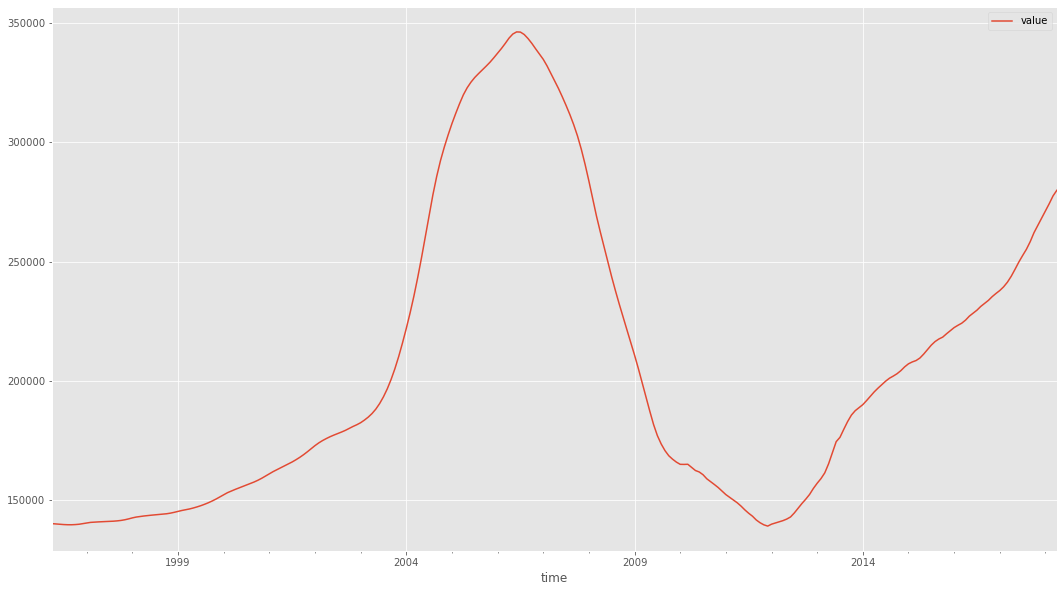

In [9]:
# plotting melted_clark_df
melted_clark_df.plot(figsize=(18,10), subplots=False, legend=True)
plt.show()

The plot above aggregates data from all the zipcodes into a single graph. I want to now look at the general trends for each of the 61 zipcodes in <b>clark_df</b> individually. From the graph below, we see that the pattern for each of the zipcodes is pretty similar. The 2007-2008 mark is when housing prices started to drop significantly. Then, around 2013, the housing prices started to really climb again.

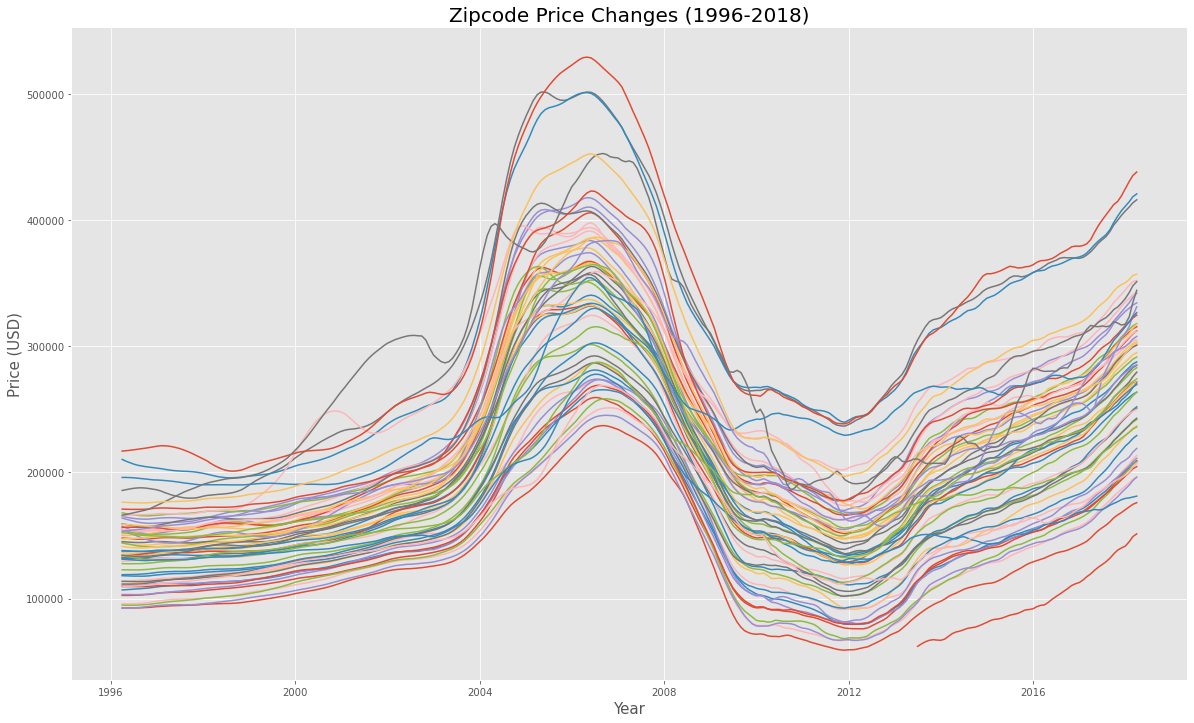

In [10]:
# Code adapted from Sanjit Varma 
# Source: https://github.com/sanjitva/Zillow-TimeSeries-Modeling/blob/main/final_notebook.ipynb

# plotting time series for all zipcodes in clark_df

# extracting zipcodes from clark_df
clark_zips = [a for a in clark_df['RegionName']]

# initialize empty dict
zip_dict = {}

# iterate over every zipcode in clark_zips
# use melt_data helper function to put data in long form
for zipcode in clark_zips:
    zip_dict[zipcode] = melt_data(clark_df[clark_df['RegionName']==zipcode])

# plot time series data
fig, ax = plt.subplots(figsize=(20,12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode],)  

ax.set_title('Zipcode Price Changes (1996-2018)', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price (USD)', fontsize=15);

Prior to creating a time series model, I want to look at ROI since 2013. Given that the dataset goes on until 2018, this would be a <b>5-year ROI</b>. I will add a column to the <b>clark_df</b> that stores this calculated <b>5-year ROI</b>. Once I have the <b>5-year ROI</b> column made in the original <b>clark_df</b> dataframe, I will then make a new dataframe called <b>clark_df_filtered</b>, which only houses zipcodes that have an <b>ROI greater than 1.0 (100%)</b>. From there, I will plot the zipcodes in <b>clark_df_filtered</b> with their corresponding ROI values converted to a percentage. 

In [11]:
# creating 5_yr_ROI col in clark_df
clark_df['5_yr_ROI'] = (clark_df['2018-04'] - clark_df['2013-04'])/(clark_df['2013-04'])
clark_df['5_yr_ROI']

<ipython-input-11-5b8a72f7d481>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clark_df['5_yr_ROI'] = (clark_df['2018-04'] - clark_df['2013-04'])/(clark_df['2013-04'])


115      1.097194
173      1.067393
195      0.627022
262      0.469280
309      0.747977
           ...   
12364    0.558061
12407    0.271807
13020    0.722440
14328    0.652904
14722    0.546990
Name: 5_yr_ROI, Length: 61, dtype: float64

In [12]:
# creating filtered clark_df that only includes zipcodes that have 5_yr_ROI greater than 1.0 (100%)
clark_df_filtered = clark_df[clark_df['5_yr_ROI']>=1.0]
clark_df_filtered

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,5_yr_ROI
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,183300,186600,190200,193400,197300,200700,203500,206600,209300,1.097194
173,95817,89121,Las Vegas,NV,Las Vegas,Clark,174,106800.0,107000.0,107200.0,...,185500,188600,192500,195500,198700,201500,204000,206700,208600,1.067393
433,95806,89110,Las Vegas,NV,Las Vegas,Clark,434,95800.0,95800.0,95800.0,...,174900,177800,181100,183800,186600,189200,191700,194500,196600,1.288708
693,95815,89119,Las Vegas,NV,Las Vegas,Clark,694,111100.0,111400.0,111700.0,...,212100,215100,219000,222300,225800,229100,232200,235000,236900,1.009330
815,95811,89115,Las Vegas,NV,Las Vegas,Clark,816,92500.0,92500.0,92600.0,...,158200,160900,164000,166300,168200,170400,172700,174700,176000,1.227848
1960,95800,89104,Las Vegas,NV,Las Vegas,Clark,1961,94800.0,94700.0,94700.0,...,181500,184600,188500,192500,196300,199500,202500,206000,208500,1.314095
2134,95798,89102,Las Vegas,NV,Las Vegas,Clark,2135,103200.0,103200.0,103200.0,...,194400,197400,201300,204900,207900,209700,212200,216000,219000,1.039106
2934,95803,89107,Las Vegas,NV,Las Vegas,Clark,2935,92300.0,92400.0,92500.0,...,172500,175000,178000,180700,184000,187000,190000,193500,196200,1.221971
3948,95838,89142,Las Vegas,NV,Las Vegas,Clark,3949,109800.0,109800.0,109900.0,...,188300,191100,193900,196300,199200,202300,205100,208400,211200,1.155102
4828,95852,89156,Las Vegas,NV,Las Vegas,Clark,4829,109500.0,109500.0,109500.0,...,183300,185800,188600,191200,194200,197000,199900,202900,204600,1.001957


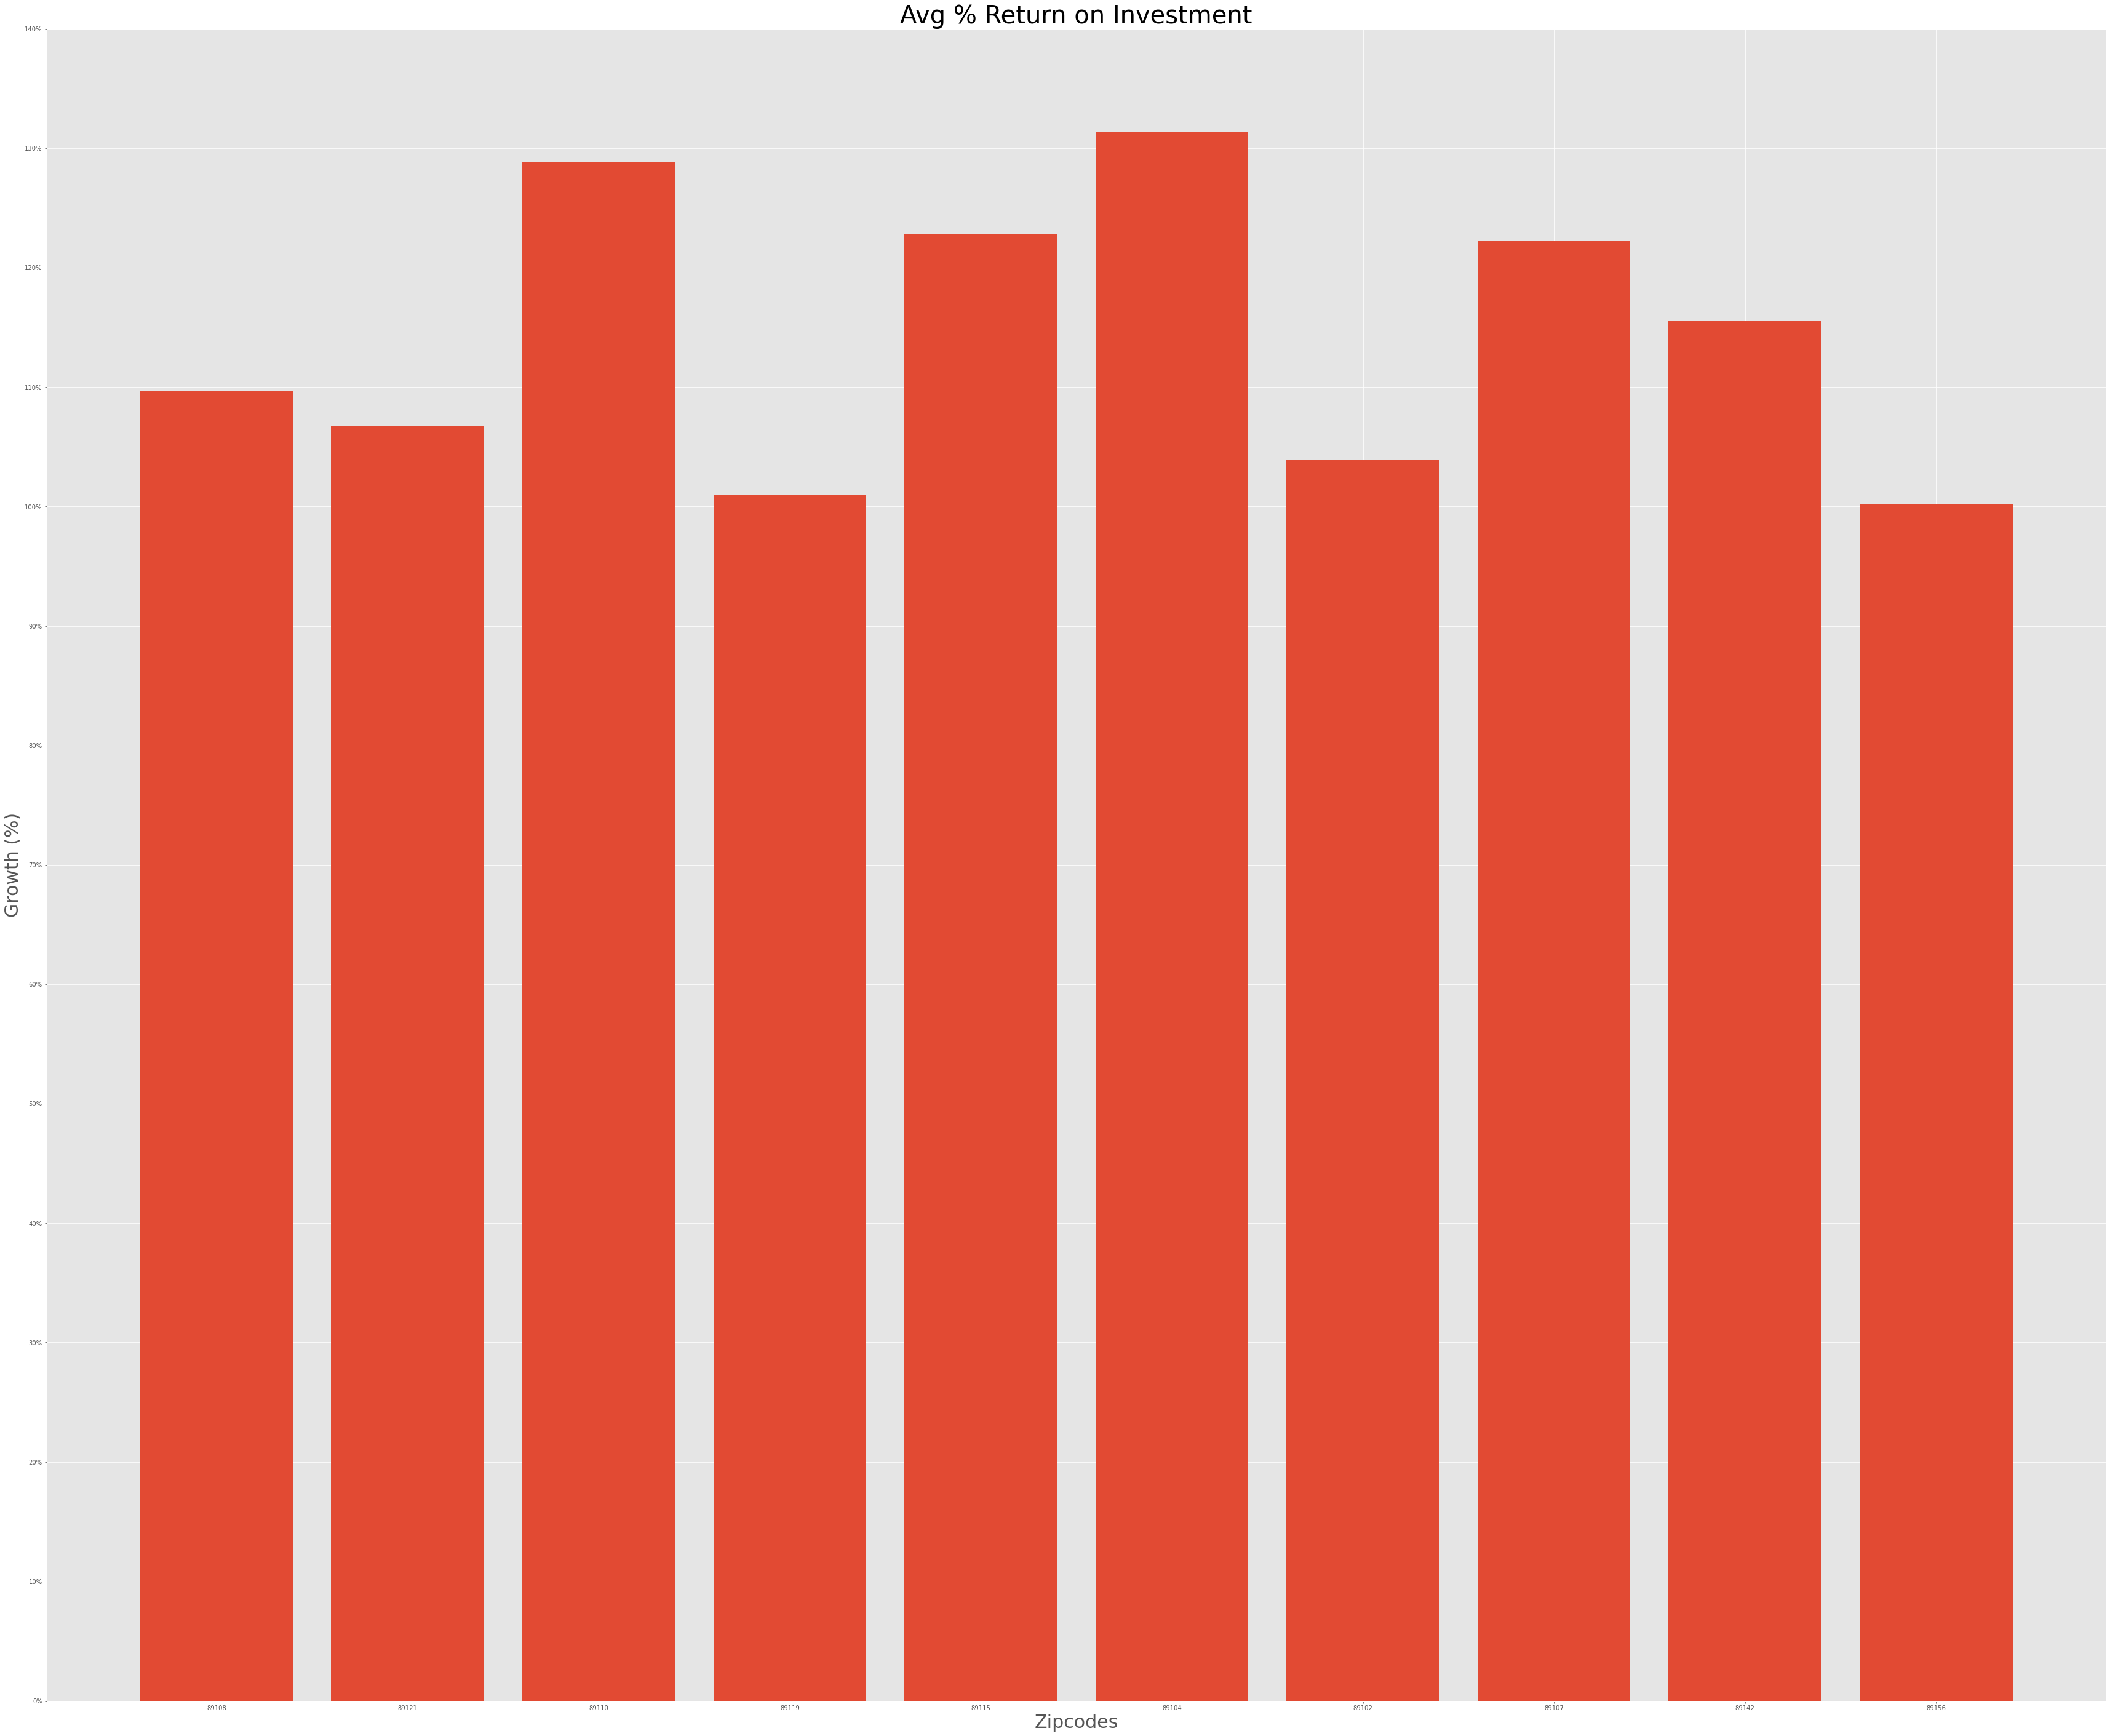

In [13]:
# Code adapted from Sanjit Varma 
# Source: https://github.com/sanjitva/Zillow-TimeSeries-Modeling/blob/main/final_notebook.ipynb

# plotting ROI for each zipcode

fig, ax = plt.subplots(figsize=(60,50))

x_labels = [str(a) for a in clark_df_filtered['RegionName']]
x = list(range(1,11))
y = [a for a in clark_df_filtered['5_yr_ROI']]

ax.bar(x,y)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([a/10 for a in list(range(0,15,1))])
ax.set_yticklabels([str(a*10)+'%' for a in list(range(0,15,1))])
ax.set_ylabel('Growth (%)', fontsize='30')
ax.set_xlabel('Zipcodes', fontsize='30')
ax.set_title('Avg % Return on Investment',fontsize='40');

The zipcode with the greatest ROI is <b>89104</b>, which has an <b>ROI of about 130%</b>. We can utilize the data for this zipcode to create our initial time series model. 

# Data Preparation: 89104 Zipcode

Prior to modeling, we need to prepare our data for the <b>89104</b> zipcode. I will begin by making a new dataframe that houses the 89104 zipcode data. From there, I will employ the <b>melt_data_2()</b> function to convert the dataframe from wide form to long form. The <b>melt_data_2()</b> function is set up exactly like the <b>melt_data()</b> helper function. The only difference is that <b>melt_data_2()</b> factors in the new <b>5_yr_ROI</b> column that was added earlier.

In [14]:
# same as melt_data helper function 
# just added '5_yr_ROI' under id_vars

def melt_data_2(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', '5_yr_ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [15]:
# make new df housing only 89104 zipcode data, then use melt_data to convert to long form
zipcode_89104_data = clark_df_filtered[clark_df_filtered['RegionName']==89104]
tseries_89104 = melt_data_2(zipcode_89104_data)
tseries_89104

,value
time,
1996-04-01,94800.0
1996-05-01,94700.0
1996-06-01,94700.0
1996-07-01,94700.0
1996-08-01,94800.0
...,...
2017-12-01,196300.0
2018-01-01,199500.0
2018-02-01,202500.0


Now that we have the melted <b>tseries_89104</b> data, our next step prior to modeling is checking for <b>seasonality</b> and <b>trends</b>. I plan to build an <b>ARIMA model</b>. Therefore, the assumptions of the <b>ARIMA model</b> are that the time series data is <b>non-seasonal</b> and <b>detrended</b>. If these assumptions are not met, we need to do more data preparation prior to building our model. 

# Seasonality and Trends

To check for trends and seasonality, we need to use methods that allow us to understand a time series' <b>stationarity</b>. In order for the assumptions of <b>non-seasonality</b> and <b>detrending</b> to be met, the data must be deemed <b>non-stationary</b>. Two ways to determine stationarity are <b>rolling statistics</b> and the <b>Dickey-Fuller Test</b>. I plan to use both of these methods on <b>tseries_89104</b>. 

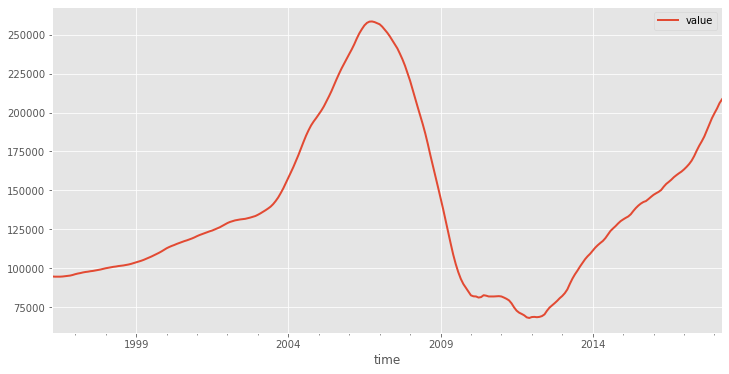

In [16]:
# plotting tseries_89104 to visualize it
tseries_89104.plot(figsize=(12,6), linewidth=2, fontsize=10);

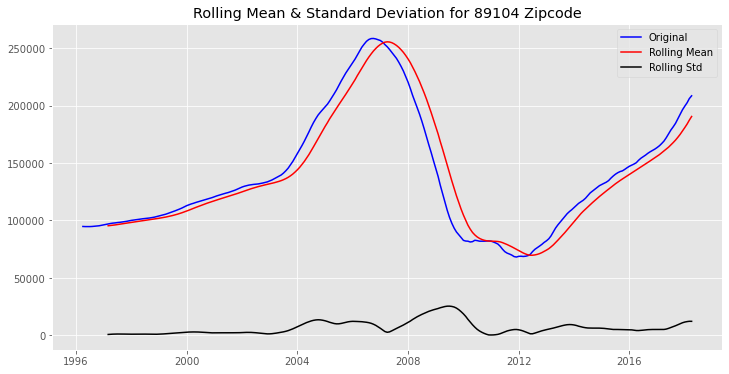

In [17]:
# check rolling statistics

# determine rolling statistics
roll_mean = tseries_89104.rolling(window=12, center=False).mean()
roll_std = tseries_89104.rolling(window=12, center=False).std()

# plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(tseries_89104, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for 89104 Zipcode')
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

# perform Dickey-Fuller test
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.613086
p-value                          0.090323
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


From our <b>rolling statistics</b> analysis, we see that the <b>rolling mean</b> is <b>not constant over time</b>, thus indicating <b>non-stationarity</b>. This <b>non-stationary</b> behavior is further supported by the <b>Dickey-Fuller Test</b> results, whose test statistic has an insignificant <b>p-value greater than 0.05</b>. This means that the null hypothesis, which states that the <b>time series is non-stationary</b> cannot be rejected. Therefore, more processing of the data must be done before getting into modeling. 

# Removing Seasonality and Trends

There are numerous methods that can be employed to remove seasonality and trends in a time series. The methods I want to use for <b>tseries_89104</b> are <b>subtracting rolling mean</b>, <b>subtracting weighted rolling mean</b>, <b>log transform</b> and <b>square root transform</b>. I will create visualizations for the time series when all four of these strategies are applied. I will also perform the <b>Dickey Fuller Test</b> for these methods to confirm non-seasonality. 

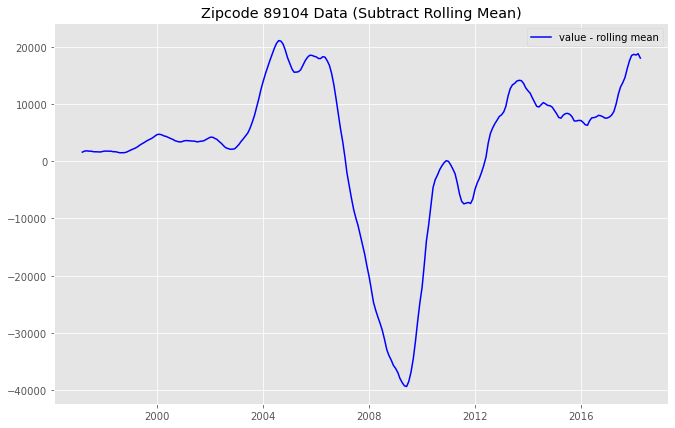

In [19]:
# subtract rolling mean
tseries_89104_minus_roll_mean = tseries_89104 - roll_mean
tseries_89104_minus_roll_mean.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(tseries_89104_minus_roll_mean, color='blue', label='value - rolling mean')
plt.legend(loc='best')
plt.title('Zipcode 89104 Data (Subtract Rolling Mean)')
plt.show(block=False)

In [20]:
# perform Dickey-Fuller test
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_minus_roll_mean['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.121069
p-value                          0.236128
#Lags Used                      10.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


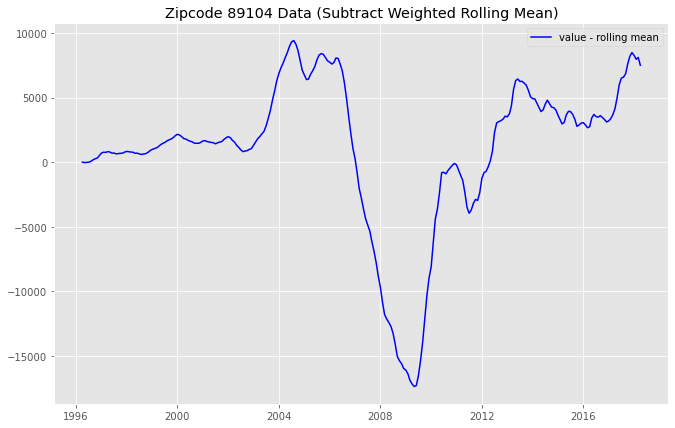

In [21]:
# weighted rolling mean

# use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = tseries_89104.ewm(halflife=2).mean()

# subtract the moving average from the original data
tseries_89104_minus_exp_roll_mean = tseries_89104 - exp_roll_mean

# plot
fig = plt.figure(figsize=(11,7))
plt.plot(tseries_89104_minus_exp_roll_mean, color='blue', label='value - rolling mean')
plt.legend(loc='best')
plt.title('Zipcode 89104 Data (Subtract Weighted Rolling Mean)')
plt.show(block=False)

In [22]:
# perform Dickey-Fuller test
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_minus_exp_roll_mean['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.478920
p-value                          0.120688
#Lags Used                      10.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


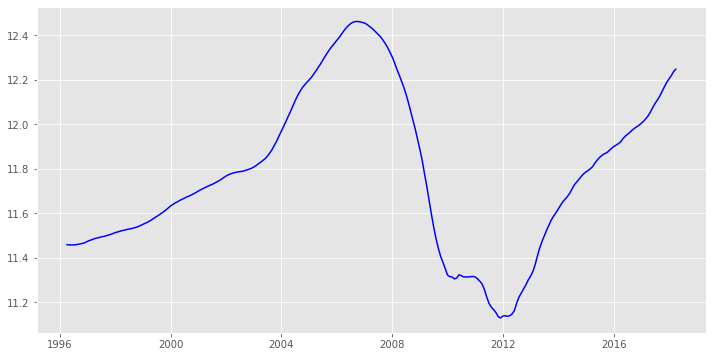

In [23]:
# plot a log transform
tseries_89104_log = np.log(tseries_89104)
fig = plt.figure(figsize=(12,6))
plt.plot(tseries_89104_log, color='blue');

In [24]:
# perform Dickey-Fuller test
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_log['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -3.420912
p-value                          0.010266
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


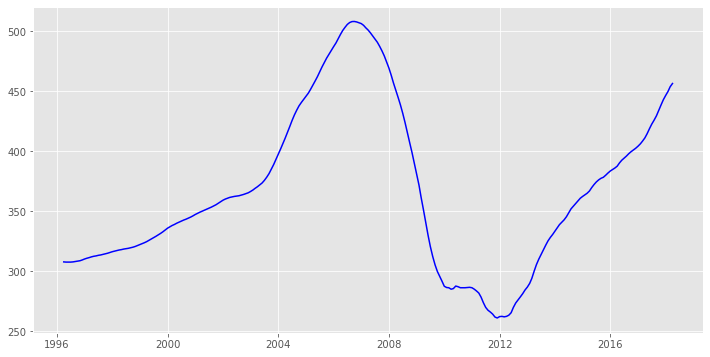

In [25]:
# plot a square root transform
tseries_89104_sqrt = np.sqrt(tseries_89104)
fig = plt.figure(figsize=(12,6))
plt.plot(tseries_89104_sqrt, color='blue');

In [26]:
# perform Dickey-Fuller test
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_sqrt['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -3.250555
p-value                          0.017239
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


After applying all four methods, we see that the best results are yielded by the <b>log transformed</b> and <b>square root transformed</b> time series. The <b>p-values</b> for the <b>Dickey-Fuller Tests</b> for these methods are <b>about 0.01</b>, indicating significance at a threshold of 0.05 and <b>non-seasonality</b>. When <b>subtracting the rolling mean</b> and <b>the weighted rolling mean</b>, the <b>Dickey-Fuller Tests</b> have <b>p-values</b> that are <b>insignificant</b>, being about <b>0.24</b> and <b>0.12</b>, respectively. I will proceed with <b>tseries_89104_log</b> and <b>tseries_89104_sqrt</b> use them for my <b>ARIMA modeling</b>. Based on the model results, I will choose the one that I want to utilize for forecasting. 

# ARIMA Modeling

Now that the data is <b>non-seasonal</b> and <b>detrended</b>, we can begin the iterative modeling process. Remember, we're using <b>tseries_89104_log</b> and <b>tseries_89104_sqrt</b>. Let's go ahead and split <b>tseries_89104_log</b> and <b>tseries_89104_sqrt</b> into training and test sets. The training sets will house data from March 2008 to March 2013, while the test sets will be information from April 2013 to April 2018.  

In [116]:
# split tseries_89104_log and tseries_89104_sqrt into training and test sets
tseries_89104_log_train = tseries_89104_log['2011-04':'2016-04']
tseries_89104_log_test = tseries_89104_log['2016-05':]
tseries_89104_sqrt_train = tseries_89104_sqrt['2011-04':'2016-04']
tseries_89104_sqrt_test = tseries_89104_sqrt['2016-05':]

Let's now turn our attention to creating our models, which we will fit on <b>tseries_89104_log_train</b> and <b>tseries_89104_sqrt_train</b>. An <b>ARIMA model</b> can be fit on time series data to predict future points. The parameters for ARIMA are specified as (p,d,q), where p is the autoregressive part of the model, d is the integrated component, and q is the moving average portion of the model. (p,d,q) represents the model's <b>order</b>. In order to find the optimal parameters for (p,d,q), a grid search method can be employed. 

In [88]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# ARIMA Modeling: tseries_89104_log_train

In [117]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# For tseries_89104_log_train
ans_log = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tseries_89104_log_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans_log.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=465.6740957912921
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=375.6310188207127
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=-15.475333285114196
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=-1.9791390773108217
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=-77.1373194613255
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=-99.55691862541374
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=-30.54762408468195


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=-36.23341775452085
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=383.2968570066556
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=309.6584459610553
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=-74.50659379063626


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=-27.886971005649038
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=-134.081248269868


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=-157.98391818598233
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=-73.32697208812131


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=-85.33602295280673
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=-305.0437339540183
ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=-262.8632530343729
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=-231.54631605235582


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=1535.1539106917658
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=-253.46121641871628
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=-260.9839227219773


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=-223.14156067331828
ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1284.6359236306878


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=-367.49123038736957
ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=-303.87258704645126


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=-279.6105227797485
ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=1128.25706662226


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=-302.62989801321373
ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=-301.90429485425864


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=-249.2951893732688


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=1156.7221640212847
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=-333.2408958989582
ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=-294.46411040450994


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=-233.35907697902041
ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=-224.48378976961584
ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=-250.48503810560044


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=-250.59870790714353
ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=-226.57476131408143


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=-234.66702481316872
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=-388.6253562480575


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=-328.38006695568754
ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=-277.8390147116749


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=-242.4505725963429
ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=-294.1749371835309


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=-288.28604044276807


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=-257.8815849809932


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=-273.610636322523
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=-441.014893238666
ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=-366.30324512039414
ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=-311.02272233267604


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=802.5959844115883
ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=-366.59773507725805


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=-366.3476377239308
ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=-282.645147602608


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=852.3612838001709
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=-442.8734503804967


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=-362.06916455242515
ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=-319.9954794424186


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=929.0728621850542


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=-367.9006610858144


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=-361.8250717303156


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=-274.4361203943649


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=977.4735965049235


In [118]:
# Find the parameters with minimal AIC value for tseries_89104_log_train
ans_df_log = pd.DataFrame(ans_log, columns=['pdq', 'pdqs', 'aic'])
ans_df_log.loc[ans_df_log['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 0, 0, 12)
aic          -442.873
Name: 56, dtype: object

Based on the numbers for <b>pdq</b> and <b>pdqs</b> selected by our grid search, we can now plug in these optimal value combinations for our <b>order</b> and <b>seasonal_order</b> parameters. Let's run the model again and look at our results. We will also look at different visualizations using the <b>.plot_diagnostics()</b> method. 

In [119]:
# Plug the optimal parameter values into a new SARIMAX model
# For tseries_89104_log_train
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104_log_train, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 0, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output_log = ARIMA_MODEL.fit()

print(output_log.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8949      0.055     16.248      0.000       0.787       1.003
ma.L1          0.3850      0.126      3.050      0.002       0.138       0.632
sigma2      2.546e-05   3.65e-06      6.967      0.000    1.83e-05    3.26e-05


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


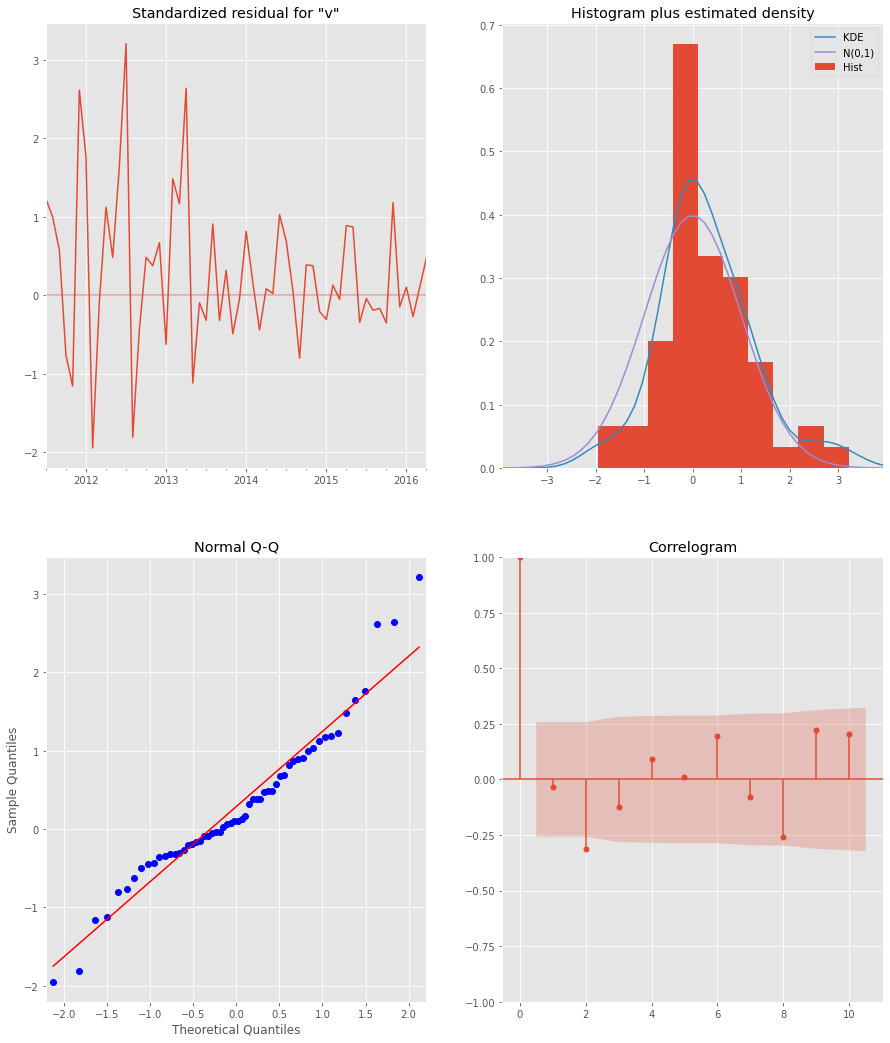

In [120]:
# Call plot_diagnostics() on tseries_89104_log_train
output_log.plot_diagnostics(figsize=(15, 18))
plt.show()

From the ARIMA model summary, we see that all coefficients are significant. From the visualizations generated by <b>.plot_diagnostics()</b>, we notice that the <b>KDE follows a relatively normal distribution</b> and matches up closely with the N(0,1) standard normal distribution curve. Though some of the points fall off the red guidance line, the <b>qq-plot</b> has dots that show a relatively linear trend. This indicates that the residuals are normally distributed. The top left plot shows no obvious seasonality; this is further supported by the <b>correlogram</b> on the bottom right, which tells us that the residuals in the time series have low correlations with the lagged versions of itself. 

# ARIMA Modeling: tseries_89104_sqrt_train

Similar to what we did with <b>tseries_89104_log_train</b>, we will find the optimal parameters for pdq and seasonal pdq for <b>tseries_89104_sqrt_train</b> and fit an optimized ARIMA model on it. 

In [121]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# For tseries_89104_sqrt_train
ans_sqrt = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tseries_89104_sqrt_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans_sqrt.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=866.1782131722584
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=699.3336140955867
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=469.68258208734886
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=361.020437973736
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=413.9136376696038
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=383.68353462162537
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=339.2531609183813


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=324.54025856982327
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=777.3263881710113


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=692.0197445572338
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=400.65504394247625


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=326.1368663020631
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=356.6372117338662


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=389.8159099286404
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=296.3067887116882


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=266.44326153698876
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=288.5172894045663
ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=210.47152121697908
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=232.98846363634416


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=896.8974194527918
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=226.0011516917649
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=211.2594058663278
ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=136.86818213042392


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1349.4922270227707
ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=216.70523166300333
ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=159.32982882035097
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=176.44800661066068


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=1579.4080117361345
ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=177.64665640250905
ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=161.1224604600139
ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=105.6431432505148


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=864.3891095229584
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=261.6961994238993
ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=168.6109368487044
ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=241.1691935028623
ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=136.7795127173289


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=233.61866133447893
ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=235.42983950587498


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=135.71758726017632
ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=124.39756346842783


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=197.242704025561
ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=128.10914978831164
ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=187.72564443535296


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=96.44200002219415
ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=189.5081863607116


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=186.78646030702998
ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=104.41251840117602


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=80.95638978936833
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=144.46430057174894
ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=104.55783264059261
ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=154.88719278338243


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=1019.0568026050956
ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=104.3629352299295
ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=105.1919538041502


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=68.08945971183866


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=1006.5387613379092
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=133.269871884829
ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=98.85960772247729
ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=136.71427744809708


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=809.4685159561521
ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=102.81335807162941
ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=99.77053369817318


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=73.15483125137624


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=795.8786674615814


In [122]:
# Find the parameters with minimal AIC value for tseries_89104_sqrt_train
ans_df_sqrt = pd.DataFrame(ans_sqrt, columns=['pdq', 'pdqs', 'aic'])
ans_df_sqrt.loc[ans_df_sqrt['aic'].idxmin()]

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           68.0895
Name: 54, dtype: object

Let's run the ARIMA model again with the grid search-selected parameters and look at our results. We will print out the model table summary and employ <b>plot_diagnostics()</b>, similar to what we did with the log times series. 

In [123]:
# Plug the optimal parameter values into a new SARIMAX model
# For tseries_89104_sqrt_train
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104_sqrt_train, 
                                        order=(1, 1, 0), 
                                        seasonal_order=(1, 1, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output_sqrt = ARIMA_MODEL.fit()

print(output_sqrt.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8318      0.046     18.131      0.000       0.742       0.922
ar.S.L12      -0.5494      0.086     -6.408      0.000      -0.717      -0.381
sigma2         0.3451      0.114      3.028      0.002       0.122       0.568


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


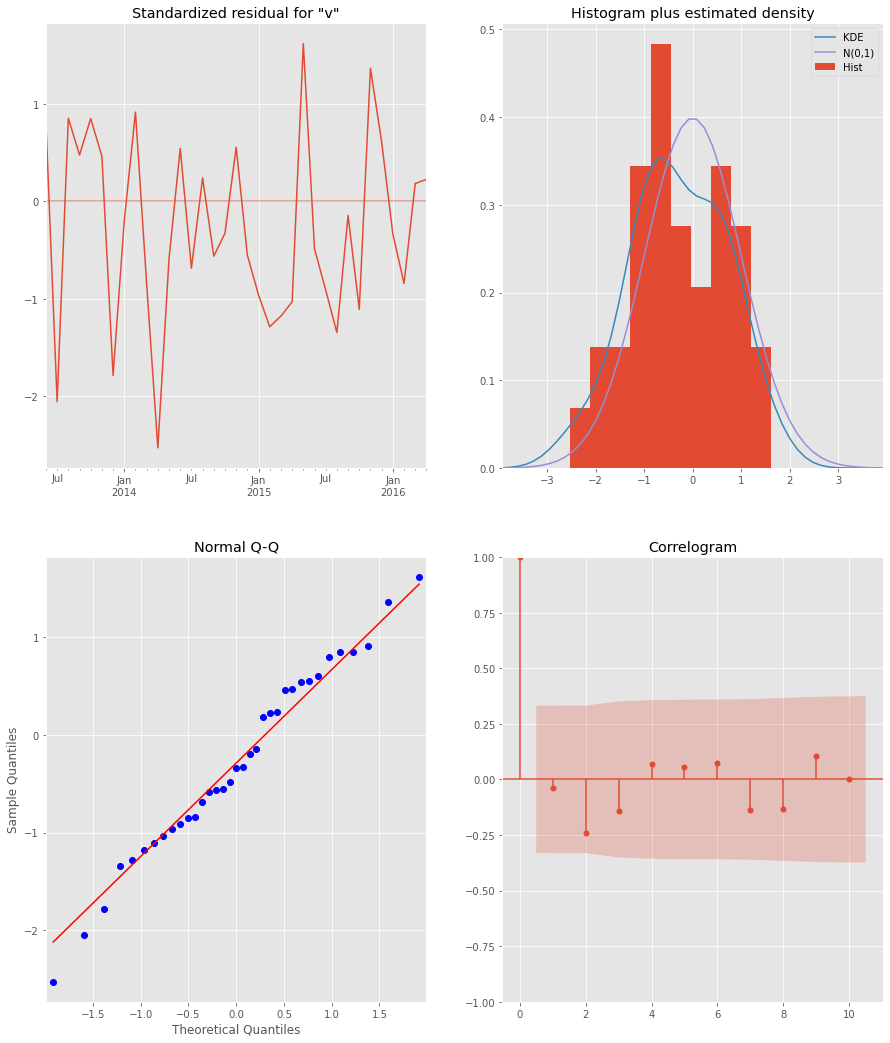

In [124]:
# Call plot_diagnostics() on tseries_89104_sqrt_train
output_sqrt.plot_diagnostics(figsize=(15, 18))
plt.show()

From the ARIMA model summary, we see that most of the coefficients are significant, except for the ar.S.L12 coefficient, which has a p-value of 0.112. From the visualizations generated by <b>.plot_diagnostics()</b>, we notice that the <b>KDE follows a relatively normal distribution</b> and matches up closely with the N(0,1) curve. While some of the points fall off the red guidance line in the <b>qq-plot</b>, the blue dots still show a relatively linear trend. This indicates that the residuals are normally distributed. The top left plot shows no obvious seasonality; this is also supported by the <b>correlogram</b>, which tells us that the residuals in the time series have low correlations with the lagged versions of itself. 

# ARIMA Modeling: tseries_89104

Earlier, we said that the original <b>tseries_89104</b> data exhibited some seasonality based on the Dickey-Fuller test results, which yielded an insignificant p-value. However, for comparison purposes, let's also create an ARIMA model for the raw <b>tseries_89104</b> time series. Similar to the modeling done for <b>tseries_89104_log_train</b> and <b>tseries_89104_sqrt_train</b>, we will use a grid search to determine the optimal parameters. It should also be noted that we will fit the model on <b>tseries_89104_train</b>, which houses data between March 2008 and March 2013. 

In [125]:
# split tseries_89104 into training and test set
tseries_89104_train = tseries_89104['2011-04':'2016-04']
tseries_89104_test = tseries_89104['2016-05':]

In [126]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# For tseries_89104_train
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tseries_89104_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=1564.2778975921672
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=1240.086835846408
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=1090.5622226632343
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=826.9544274406562
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=1043.0307259861386
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=1063.2294436311167
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=812.0926584373108


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=787.9294208914371
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=1499.1885987939133
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=55870.17097725927
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=1076.5557825338994


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=769.3215722905629
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=1234.5078395787853
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=1186.1983640387239
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=813.1995312698924


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=768.7497205477185
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=1048.3880155478075
ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=822.1359505003009
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=828.7737715604919


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=987.5359655629633
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=839.1377263059767
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=818.3980310487988
ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=598.0527155497268


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1395.4855142868048
ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=964.2475944711127
ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=756.1883892949684


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=789.7619566001679
ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=1182.376481392817


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=821.7474789693401
ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=750.4186952021468


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=567.3004873024937
ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=2558.538808398784
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=1024.0440049566723


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=797.5165860132394
ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=849.6024716437267


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=599.7708937696551
ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=863.2523281392561
ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=795.6607470040444
ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=615.5768308981429


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=586.9766750679391
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=956.4612852100003


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=750.5270251692924
ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=809.9828768724805


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=551.2047971168554
ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=853.6991523472648


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=751.1411778186782
ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=594.78263209189


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=544.577161554496
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=896.6469086704924
ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=709.7755969227086
ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=753.050150458566


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=1361.4301777923213
ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=708.5287561909184
ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=709.6804100802797


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=519.0300086202845


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=562.9012050290838
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=873.2825975664517
ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=691.3482808867926
ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=732.2514990571804


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=737.4920710068074
ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=707.3897911143922
ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=689.1296850321929


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=519.2817762850077


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=674.4600996718451


In [127]:
# Find the parameters with minimal AIC value for tseries_89104_train
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic            519.03
Name: 54, dtype: object

In [128]:
# Plug the optimal parameter values into a new SARIMAX model
# For tseries_89104_train
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104_train, 
                                        order=(1, 1, 0), 
                                        seasonal_order=(1, 1, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8381      0.048     17.461      0.000       0.744       0.932
ar.S.L12      -0.5862      0.094     -6.250      0.000      -0.770      -0.402
sigma2      1.359e+05   4.77e+04      2.848      0.004    4.24e+04     2.3e+05


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


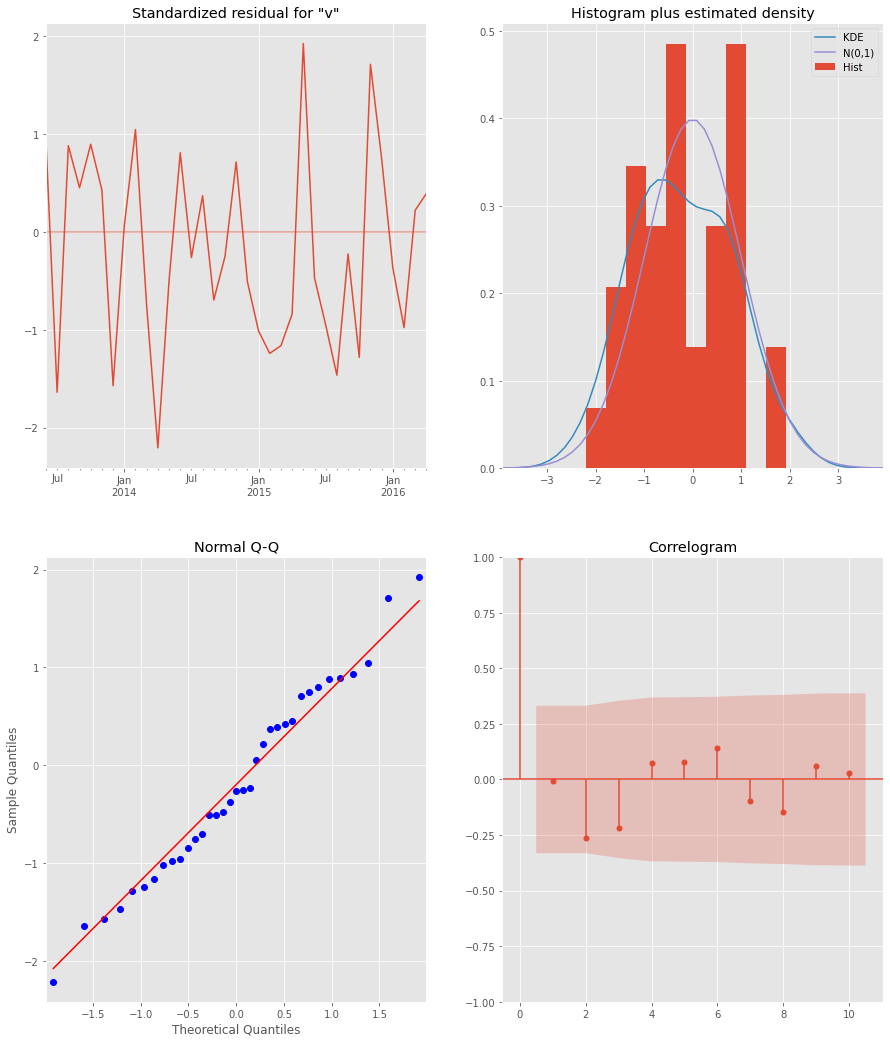

In [129]:
# Call plot_diagnostics() on tseries_89104_train
output.plot_diagnostics(figsize=(15, 18))
plt.show()

Explain plot_diagnostics for tseries_89104_train

# Choosing Model

Between the three ARIMA models for <b>tseries_89104_log_train</b>, <b>tseries_89104_sqrt_train</b>, and <b>tseries_89104_train</b>, I will proceed with the model for <b>tseries_89104_log_train</b> because the coefficients were all significant, unlike the other two models, which had some insignificant coefficients. 

# Validating Model 

Now that we've deemed the fit of the model to be satisfactory, we can validate the chosen model using predicted values to compare to real values in the time series. This will give us insight on the accuracy of our forecasts. I will employ the <b>get_prediction()</b> and <b>conf_int()</b> methods to achieve this model validation. In terms of forecasting, I will use <b>one-step ahead forecasting</b>. The metric I will utilize to determine the accuracy of the forecasts will be <b>MSE</b>. 

# One-Step Ahead Forecasting

In [131]:
# Get predictions starting from 2015-04 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-05'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf

,lower value,upper value
2016-05-01,151040.747474,152486.074821
2016-06-01,151952.166475,154976.476572
2016-07-01,152978.521979,157735.393172
2016-08-01,153862.754267,160426.294348
2016-09-01,154215.690343,162611.467400
2016-10-01,154360.352874,164583.426049
2016-11-01,154935.293583,166961.326399
2016-12-01,155462.047099,169254.488325
2017-01-01,155742.807208,171257.672239
2017-02-01,155871.505478,173060.616213


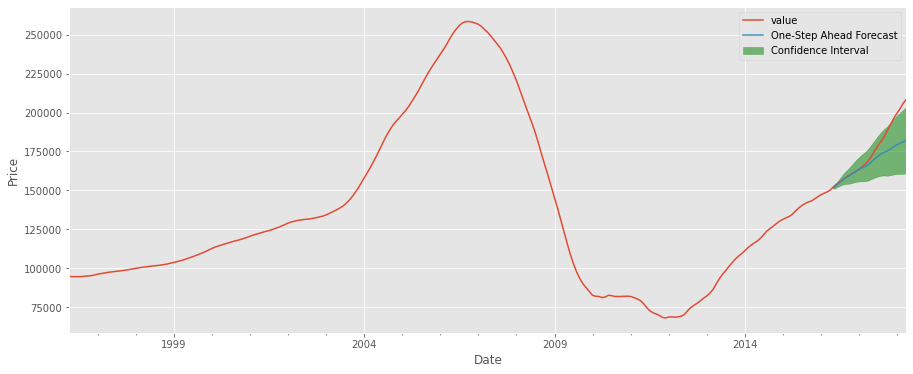

In [132]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = tseries_89104.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5, label='Confidence Interval')

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

# Forecasting Future 

Fit entire series (not just training set)

In [133]:
# Plug the parameter values from our Auto ARIMA model into a new SARIMAX model that fits the entire series.
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104, 
                                        order=(1, 1, 0), 
                                        seasonal_order=(1, 1, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9808      0.015     64.057      0.000       0.951       1.011
ar.S.L12      -0.5465      0.056     -9.719      0.000      -0.657      -0.436
sigma2      3.602e+05   2.72e+04     13.231      0.000    3.07e+05    4.14e+05


C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [134]:
## Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['value'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction

,lower,upper,prediction
2018-05-01,210616.814723,212969.297090,211793.055906
2018-06-01,212568.347526,217788.321622,215178.334574
2018-07-01,213803.525923,222473.850909,218138.688416
2018-08-01,214656.955872,227256.972096,220956.963984
2018-09-01,215536.595724,232474.520636,224005.558180
2018-10-01,216422.460864,238054.067426,227238.264145
2018-11-01,217127.088258,243767.332858,230447.210558
2018-12-01,217531.209884,249462.037089,233496.623486
2019-01-01,217686.025978,255161.916672,236423.971325
2019-02-01,217730.227118,260982.319591,239356.273355


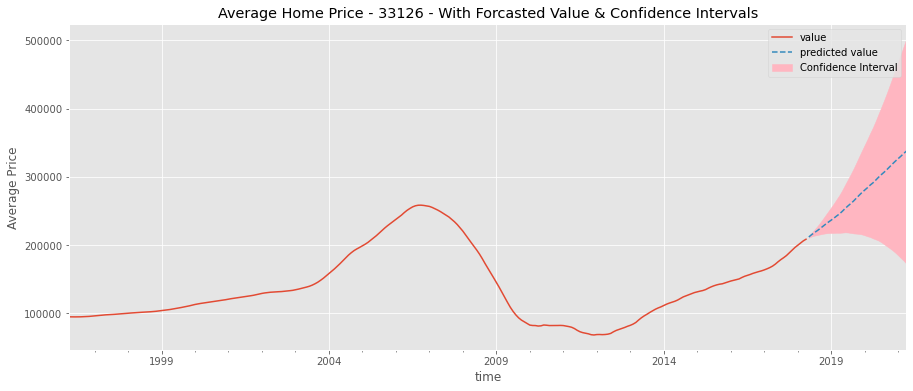

In [135]:
#Plotting our Forecast

fig, ax = plt.subplots()
tseries_89104.plot(ax=ax, label='Real Values')


future_prediction['prediction'].plot(ax=ax,label='predicted value',ls='--')

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='lightpink',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("Average Price")
plt.title('Average Home Price - 33126 - With Forcasted Value & Confidence Intervals')
plt.show()

Use model to forecast all zipcodes (filtered ROI dataset)

# Recommendations

Find Top 5 zipcodes

# Limitations